**Important**: Click on "*Kernel*" > "*Restart Kernel and Clear All Outputs*" *before* reading this chapter in [JupyterLab <img height="12" style="display: inline-block" src="static/link_to_jp.png">](https://jupyterlab.readthedocs.io/en/stable/) (e.g., in the cloud on [MyBinder <img height="12" style="display: inline-block" src="static/link_to_mb.png">](https://mybinder.org/v2/gh/webartifex/intro-to-python/master?urlpath=lab/tree/03_conditionals_00_content.ipynb))

# Chapter 3: Conditionals & Exceptions

We analyzed every aspect of the `average_evens()` function in [Chapter 2 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/02_functions_00_content.ipynb) except for the `if`-related parts. While it does what we expect it to, there is a whole lot more to learn by taking it apart. In particular, the `if` may occur within both a **statement** or an **expression**, analogous as to how a noun in a natural language can be the subject of *or* an object in a sentence. What is common to both usages is that it leads to code being executed for *parts* of the input only. It is a way of controlling the **flow of execution** in a program.

After deconstructing `if` in the first part of this chapter, we take a close look at a similar concept, namely handling **exceptions**.

## Boolean Expressions

Any expression that is either true or not is called a **boolean expression**. It is such simple true-or-false observations about the world on which mathematicians, and originally philosophers, base their rules of reasoning: They are studied formally in the field of [propositional logic <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Propositional_calculus).

A trivial example involves the equality operator `==` that evaluates to either `True` or `False` depending on its operands "comparing equal" or not.

In [1]:
42 == 42

True

In [2]:
42 == 123

False

The `==` operator handles objects of *different* types: Because of that, it implements a notion of equality in line with how humans think of things being equal or not. After all, `42` and `42.0` are different $0$s and $1$s for a computer and other programming languages may say `False` here! Technically, this is yet another example of operator overloading.

In [3]:
42 == 42.0

True

There are, however, cases where the `==` operator seems to not work intuitively. [Chapter 5 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/05_numbers_00_content.ipynb#Imprecision) provides more insights into this "bug."

In [4]:
42 == 42.000000000000001

True

## The `bool` Type

`True` and `False` are built-in *objects* of type `bool`.

In [5]:
True

True

In [6]:
id(True)

94109522858624

In [7]:
type(True)

bool

In [8]:
False

False

In [9]:
id(False)

94109522858592

In [10]:
type(False)

bool

Let's not confuse the boolean `False` with `None`, another built-in object! We saw the latter before in [Chapter 2 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/02_functions_00_content.ipynb#Function-Definitions) as the *implicit* return value of a function without a `return` statement.

We might think of `None` indicating a "maybe" or even an "unknown" answer; however, for Python, there are no "maybe" or "unknown" objects, as we see further below!

Whereas `False` is of type `bool`, `None` is of type `NoneType`. So, they are unrelated! On the contrary, as both `True` and `False` are of the same type, we could call them "siblings."

In [11]:
None

In [12]:
id(None)

94109522845584

In [13]:
type(None)

NoneType

### Singletons

`True`, `False`, and `None` have the property that they each exist in memory only *once*. Objects designed this way are so-called **singletons**. This **[design pattern <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Design_Patterns)** was originally developed to keep a program's memory usage at a minimum. It may only be employed in situations where we know that an object does *not* mutate its value (i.e., to reuse the bag analogy from [Chapter 1 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/01_elements_00_content.ipynb#Objects-vs.-Types-vs.-Values), no flipping of $0$s and $1$s in the bag is allowed). In languages "closer" to the memory like C, we would have to code this singleton logic ourselves, but Python has this built in for *some* types.

We verify this with either the `is` operator or by comparing memory addresses.

In [14]:
a = True
b = True

a is b

True

To contrast this, we create *two* `789` objects.

In [15]:
a = 789
b = 789

a is b

False

So the following expression regards *four* objects in memory: *One* `list` object holding six references to *three* other objects.

In [16]:
[True, False, None, True, False, None]

[True, False, None, True, False, None]

## Relational Operators

The equality operator is only one of several **relational** (i.e., "comparison") **operators** who all evaluate to a `bool` object.

In [17]:
42 == 123

False

In [18]:
42 != 123  # "not equal to"

True

The "less than" `<` or "greater than" `>` operators mean "*strictly* less than" or "*strictly* greater than" but may be combined with the equality operator into just `<=` and `>=`. This is a shortcut for using the logical `or` operator as described in the next section.

In [19]:
42 < 123

True

In [20]:
42 <= 123

True

In [21]:
42 > 123

False

In [22]:
42 >= 123

False

## Logical Operators

Boolean expressions may be combined or negated with the **logical operators** `and`, `or`, and `not` to form new boolean expressions. This may be done repeatedly to obtain boolean expressions of arbitrary complexity.

Their usage is similar to how the equivalent words are used in everyday English:

- `and` evaluates to `True` if *both* operands evaluate to `True` and `False` otherwise,
- `or` evaluates to `True` if either one *or* both operands evaluate to `True` and `False` otherwise, and
- `not` evaluates to `True` if its *only* operand evaluates to `False` and vice versa.

In [23]:
a = 42
b = 87

Relational operators have **[higher precedence <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/reference/expressions.html#operator-precedence)** over logical operators. So the following expression means what we intuitively think it does.

In [24]:
a > 5 and b <= 100

True

However, sometimes, it is good to use *parentheses* around each operand for clarity.

In [25]:
(a > 5) and (b <= 100)

True

This is especially so when several logical operators are combined.

In [26]:
a <= 5 or not b > 100

True

In [27]:
(a <= 5) or not (b > 100)

True

In [28]:
(a <= 5) or (not (b > 100))  # no need to "over do" it

True

For even better readability, some practitioners suggest to *never* use the `>` and `>=` operators (cf., [source](https://llewellynfalco.blogspot.com/2016/02/dont-use-greater-than-sign-in.html); note that the included example is written in [Java <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Java_%28programming_language%29) where `&&` means `and` and `||` means `or`).

We may **chain** operators if the expressions that contain them are combined with the `and` operator. For example, the following two cells implement the same logic, where the second is a lot easier to read.

In [29]:
5 < a and a < 87

True

In [30]:
5 < a < 87

True

### Truthy vs. Falsy

The operands of a logical operator do not need to be *boolean* expressions but may be *any* expression. If an operand does *not* evaluate to an object of type `bool`, Python automatically casts it as such. Then, Pythonistas say that the expression is evaluated in a boolean context.

For example, any non-zero numeric object is cast as `True`. While this behavior allows writing more concise and thus more "beautiful" code, it may also be a source of confusion.

So, `(a - 40)` is cast as `True` and then the overall expression evaluates to `True` as well.

In [31]:
(a - 40) and (b < 100)

True

Whenever we are unsure how Python evaluates a non-boolean expression in a boolean context, the [bool() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#bool) built-in allows us to do it ourselves. [bool() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#bool), like [int() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#int), is yet another *constructor*.

In [32]:
bool(a - 40)

True

In [33]:
bool(a - 42)

False

Let's keep in mind that negative numbers also evaluate to `True`!

In [34]:
bool(a - 44)

True

In a boolean context, `None` is cast as `False`! So, `None` is *not* a "maybe" answer but a "no."

In [35]:
bool(None)

False

Another good rule to know is that container types (e.g., `list`) evaluate to `False` whenever they are empty and `True` if they hold at least one element.

In [36]:
bool([])

False

In [37]:
bool([False])

True

With `str` objects, the empty `""` evaluates to `False`, and any other to `True`.

In [38]:
bool("")

False

In [39]:
bool("Lorem ipsum dolor sit amet.")

True

Pythonistas use the terms **truthy** or **falsy** to describe a non-boolean expression's behavior when evaluated in a boolean context.

### Short-Circuiting

When evaluating expressions involving the `and` and `or` operators, Python follows the **[short-circuiting <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Short-circuit_evaluation)** strategy: Once it is clear what the overall truth value is, no more operands are evaluated, and the result is *immediately* returned.

Also, if such expressions are evaluated in a non-boolean context, the result is returned as is and *not* cast as a `bool` type.

The two rules can be summarized as:

- `a or b`: If `a` is truthy, it is returned *without* evaluating `b`. Otherwise, `b` is evaluated *and* returned.
- `a and b`: If `a` is falsy, it is returned *without* evaluating `b`. Otherwise, `b` is evaluated *and* returned.

The rules may also be chained or combined.

Let's look at a couple of examples below. To visualize which operands are evaluated, we define a helper function `expr()` that prints out the only argument it is passed before returning it.

In [40]:
def expr(arg):
    """Print and return the only argument."""
    print("Arg:", arg)
    return arg

With the `or` operator, the first truthy operand is returned.

In [41]:
0 or 1

1

In [42]:
expr(0) or expr(1)  # both operands are evaluated

Arg: 0
Arg: 1


1

In [43]:
1 or 2

1

In [44]:
expr(1) or expr(2)  # 2 is not evaluated

Arg: 1


1

In [45]:
0 or 1 or 2

1

In [46]:
expr(0) or expr(1) or expr(2)  # 2 is not evaluated

Arg: 0
Arg: 1


1

If all operands are falsy, the last one is returned.

In [47]:
False or [] or 0

0

In [48]:
expr(False) or expr([]) or expr(0)  # all operands are evaluated

Arg: False
Arg: []
Arg: 0


0

With the `and` operator, the first falsy operand is returned.

In [49]:
0 and 1

0

In [50]:
expr(0) and expr(1)  # 1 is not evaluated

Arg: 0


0

In [51]:
1 and 0

0

In [52]:
expr(1) and expr(0)  # both operands are evaluated

Arg: 1
Arg: 0


0

In [53]:
1 and 0 and 2

0

In [54]:
expr(1) and expr(0) and expr(2)  # 2 is not evaluated

Arg: 1
Arg: 0


0

If all operands are truthy, the last one is returned.

In [55]:
1 and 2 and 3

3

In [56]:
expr(1) and expr(2) and expr(3)

Arg: 1
Arg: 2
Arg: 3


3

The crucial takeaway is that Python does *not* necessarily evaluate *all* operands and, therefore, our code should never rely on that assumption.

## The `if` Statement

To write useful programs, we need to control the flow of execution, for example, to react to user input. The logic by which a program follows the rules from the "real world" is referred to as **[business logic <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Business_logic)**.

One language feature to do so is the `if` statement (cf., [reference <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/reference/compound_stmts.html#the-if-statement)). It consists of:

- *one* mandatory `if`-clause,
- an *arbitrary* number of `elif`-clauses (i.e., "else if"), and
- an *optional* `else`-clause.

The `if`- and `elif`-clauses each specify one *boolean* expression, also called **condition** here, while the `else`-clause serves as the "catch everything else" case.

In contrast to our intuitive interpretation in natural languages, only the code in *one* of the alternatives, also called **branches**, is executed. To be precise, it is always the code in the first clause whose condition evaluates to `True`.

In terms of syntax, the header lines end with a colon, and the code blocks are indented. Formally, any statement that is written across several lines is called a **[compound statement <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/reference/compound_stmts.html#compound-statements)**, the code blocks are called **suites** and belong to one header line, and the term **clause** refers to a header line and its suite as a whole. So far, we have seen three compound statements: `for`, `if`, and `def`. On the contrary, **[simple statements <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/reference/simple_stmts.html#simple-statements)**, for example, `=`, `del`, or `return`, are written on *one* line.

As an example, let's write code that checks if a randomly drawn number is divisible by `2`, `3`, both, or none. The code should print out a customized message for each of the *four* cases.

In [57]:
numbers = [7, 11, 8, 5, 3, 12, 2, 6, 9, 10, 1, 4]

In [58]:
import random

In [59]:
random.seed(789)

#### "Wrong Logic" Example: Is the number divisible by `2`, `3`, both, or none?

It turns out that translating this task into code is not so trivial. Whereas the code below looks right, it is *incorrect*. The reason is that the order of the `if`-, `elif`-, and `else`-clauses matters.

In [60]:
number = random.choice(numbers)

if number % 2 == 0:
    print(number, "is divisible by 2 only")
elif number % 3 == 0:
    print(number, "is divisible by 3 only")
elif number % 2 == 0 and number % 3 == 0:
    print(number, "is divisible by 2 and 3")
else:
    print(number, "is divisible by neither 2 nor 3")

6 is divisible by 2 only


#### "Correct Logic" Example: Is the number divisible by `2`, `3`, both, or none?

As a number divisible by both `2` and `3` is always a special (i.e., narrower) case of a number being divisible by either `2` or `3` on their own, we must check for that condition first. The order of the two latter cases is not important as they are mutually exclusive. Below is a correct implementation of the program.

In [61]:
random.seed(789)

In [62]:
number = random.choice(numbers)

if number % 3 == 0 and number % 2 == 0:
    print(number, "is divisible by 2 and 3")
elif number % 3 == 0:
    print(number, "is divisible by 3 only")
elif number % 2 == 0:
    print(number, "is divisible by 2 only")
else:
    print(number, "is divisible by neither 2 nor 3")

6 is divisible by 2 and 3


#### "Concise Logic" Example: Is the number divisible by `2`, `3`, both, or none?

A minor improvement could be to replace `number % 3 == 0 and number % 2 == 0` with the conciser `number % 6 == 0`. However, this has no effect on the order that is still essential for the code's correctness.

In [63]:
random.seed(789)

In [64]:
number = random.choice(numbers)

if number % 6 == 0:
    print(number, "is divisible by 2 and 3")
elif number % 3 == 0:
    print(number, "is divisible by 3 only")
elif number % 2 == 0:
    print(number, "is divisible by 2 only")
else:
    print(number, "is divisible by neither 2 nor 3")

6 is divisible by 2 and 3


#### Only the `if`-clause is mandatory

Often, we only need a reduced form of the `if` statement.

For example, below we **inject** code to print a message at random.

In [65]:
if random.random() > 0.5:
    print("You read this as often as you see heads when tossing a coin")

You read this as often as you see heads when tossing a coin


#### Common Use Case: A binary Choice

More often than not, we model a **binary choice**. Then, we only need to write an `if`- and an `else`-clause.

In [66]:
random.seed(789)

In [67]:
number = random.choice(numbers)

if number % 2 == 0:
    print(number, "is even")
else:
    print(number, "is odd")

6 is even


To write the condition even conciser, we may take advantage of Python's implicit casting and leave out the `== 0`. However, then we *must* exchange the two suits! The `if`-clause below means "If the `number` is odd" in plain English. That is the opposite of the `if`-clause above.

In [68]:
random.seed(789)

In [69]:
number = random.choice(numbers)

if number % 2:  # Note the opposite meaning!
    print(number, "is odd")
else:
    print(number, "is even")

6 is even


#### "Hard to read" Example: Nesting `if` Statements

We may **nest** `if` statements to control the flow of execution in a more granular way. Every additional layer, however, makes the code *less* readable, in particular, if we have more than one line per code block.

For example, the code cell below implements an [A/B Testing <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/A/B_testing) strategy where half the time a "complex" message is shown to a "user" while in the remaining times an "easy" message is shown. To do so, the code first "tosses a coin" and then checks a randomly drawn `number`.

In [70]:
random.seed(789)

In [71]:
number = random.choice(numbers)

# Coin is heads.
if random.random() > 0.5:
    if number % 2 == 0:
        print(number, "can be divided by 2 without a rest")
    else:
        print(number, "divided by 2 results in a non-zero rest")
# Coin is tails.
else:
    if number % 2 == 0:
        print(number, "is even")
    else:
        print(number, "is odd")

6 can be divided by 2 without a rest


#### "Easy to read" Example: Flattening nested `if` Statements

A way to make this code more readable is to introduce **temporary variables** *in combination* with the `and` operator to **flatten** the branching logic. The `if` statement then reads almost like plain English. In contrast to many other languages, creating variables is a computationally *cheap* operation in Python (i.e., only a reference is created) and also helps to document the code *inline* with meaningful variable names.

Flattening the logic *without* temporary variables could lead to *more* sub-expressions in the conditions be evaluated than necessary. Do you see why?

In [72]:
random.seed(789)

In [73]:
number = random.choice(numbers)

coin_is_heads = random.random() > 0.5
number_is_even = number % 2 == 0

if coin_is_heads and number_is_even:
    print(number, "can be divided by 2 without a rest")
elif coin_is_heads and not number_is_even:
    print(number, "divided by 2 results in a non-zero rest")
elif not coin_is_heads and number_is_even:
    print(number, "is even")
else:
    print(number, "is odd")

6 can be divided by 2 without a rest


## The `if` Expression

When an `if` statement assigns an object to a variable according to a true-or-false condition (i.e., a binary choice), there is a shortcut: We assign the variable the result of a so-called **[conditional expression <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/reference/expressions.html#conditional-expressions)**, or `if` expression for short, instead.

Think of a situation where we evaluate a piece-wise functional relationship $y = f(x)$ at a given $x$, for example:

$
y = f(x) =
\begin{cases}
0, \text{ if } x \le 0 \\
x, \text{ otherwise}
\end{cases}
$

Of course, we could use an `if` statement as above to do the job. Yet, this is rather lengthy.

In [74]:
x = 3

if x <= 0:
    y = 0
else:
    y = x

y

3

On the contrary, the `if` expression fits into one line. The main downside is a potential loss in readability, in particular, if the functional relationship is not that simple. Also, some practitioners do *not* like that the condition is in the middle of the expression.

In [75]:
x = 3

y = 0 if x <= 0 else x

y

3

In this example, however, the most elegant solution is to use the built-in [max() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#max) function.

In [76]:
x = 3

y = max(0, x)

y

3

## The `try` Statement

In the previous two chapters, we encountered a couple of *runtime* errors. A natural urge we might have after reading about conditional statements is to write code that somehow reacts to the occurrence of such exceptions.

Consider a situation where we are given some user input that may contain values that cause problems. To illustrate this, we draw a random integer between `0` and `5`, and then divide by this number. Naturally, we see a `ZeroDivisionError` in 16.6% of the cases.

In [77]:
random.seed(123)

In [78]:
user_input = random.choice([0, 1, 2, 3, 4, 5])

1 / user_input

ZeroDivisionError: division by zero

With the compound `try` statement (cf., [reference <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/reference/compound_stmts.html#the-try-statement)), we can **handle** any *runtime* error.

In its simplest form, it comes with just two clauses: `try` and `except`. The following tells Python to execute the code in the `try`-clause, and if *anything* goes wrong, continue in the `except`-clause instead of **raising** an error to us. Of course, if nothing goes wrong, the `except`-clause is *not* executed.

In [79]:
random.seed(123)

In [80]:
user_input = random.choice([0, 1, 2, 3, 4, 5])

try:
    print("The result is", 1 / user_input)
except:
    print("Something went wrong")

Something went wrong


However, it is good practice *not* to handle *any* possible exception but only the ones we may *expect* from the code in the `try`-clause. The reason for that is that we do not want to risk *suppressing* an exception that we do *not* expect. Also, the code base becomes easier to understand as we communicate what could go wrong during execution in an *explicit* way to the (human) reader. Python comes with a lot of [built-in exceptions <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/exceptions.html#concrete-exceptions) that we should familiarize ourselves with.

Another good practice is to always keep the code in the `try`-clause short to not *accidentally* handle an exception we do *not* want to handle.

In the example, we are dividing numbers and may expect a `ZeroDivisionError`.

In [81]:
random.seed(123)

In [82]:
user_input = random.choice([0, 1, 2, 3, 4, 5])

try:
    print("The result is", 1 / user_input)
except ZeroDivisionError:
    print("Something went wrong")

Something went wrong


Often, we may have to run some code *independent* of an exception occurring, for example, to close a connection to a database. To achieve that, we add a `finally`-clause to the `try` statement.

Similarly, we may have to run some code *only if* no exception occurs, but we do not want to put it in the `try`-clause as per the good practice mentioned above. To achieve that, we add an `else`-clause to the `try` statement.

To showcase everything together, we look at one last example. It is randomized: So, run the cell several times and see for yourself.

In [83]:
random.seed(123)

In [84]:
user_input = random.choice([0, 1, 2, 3, 4, 5])

try:
    result = 1 / user_input
except ZeroDivisionError:
    print("Oops. Division by 0. How does that work?")
else:
    print("The result is", result)
finally:
    print("I am always printed")

Oops. Division by 0. How does that work?
I am always printed


## TL;DR

- **boolean expressions** evaluate to either `True` or `False`
- **relational operators** compare operands according to "human" interpretations
- **logical operators** combine boolean sub-expressions to more "complex" expressions
- the **conditional statement** allows **controlling** the **flow of execution** depending on some **conditions**
- a **conditional expression** is a short form of a conditional statement
- **exception handling** is also a common way of **controlling** the **flow of execution**, in particular, if we have to be prepared for bad input data

## Further Resources

A lecture-style **video presentation** of this chapter is integrated below (cf., the [video <img height="12" style="display: inline-block" src="static/link_to_yt.png">](https://www.youtube.com/watch?v=aDbblINzuGQ&list=PL-2JV1G3J10lQ2xokyQowcRJI5jjNfW7f) or the entire [playlist <img height="12" style="display: inline-block" src="static/link_to_yt.png">](https://www.youtube.com/playlist?list=PL-2JV1G3J10lQ2xokyQowcRJI5jjNfW7f)).

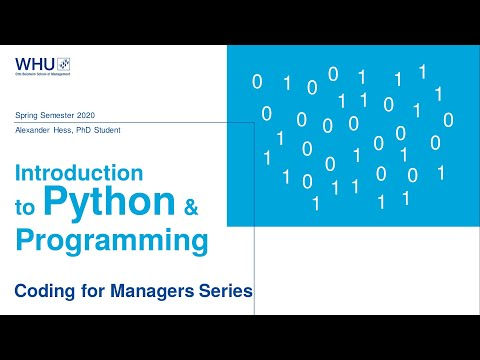

In [85]:
from IPython.display import YouTubeVideo
YouTubeVideo("aDbblINzuGQ", width="60%")